In [19]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train_ver2.csv')

/Users/yshin/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

In [7]:
#24개의 고객 관련 변수 중 수치형 변수의 요약통계
num_cols = [col for col in train_data.columns[:24] if train_data[col].dtype in ['int64','float64']]
train_data[num_cols].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


In [8]:
#24개의 고객 관련 변수 중 범주형 변수의 요약통계
cat_cols = [col for col in train_data.columns[:24] if train_data[col].dtype in ['O']]
train_data[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [9]:
#범주형 변수의 고유값 확인
for col in cat_cols:
    uniq = np.unique(train_data[col].astype(str))
    print('-'*50)
    print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'Q

--------------------------------------------------
# col indrel_1mes, n_uniq 10, uniq ['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan']
--------------------------------------------------
# col tiprel_1mes, n_uniq 6, uniq ['A' 'I' 'N' 'P' 'R' 'nan']
--------------------------------------------------
# col indresi, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col indext, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col conyuemp, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col canal_entrada, n_uniq 163, uniq ['004' '007' '013' '025' 'K00' 'KAA' 'KAB' 'KAC' 'KAD' 'KAE' 'KAF' 'KAG'
 'KAH' 'KAI' 'KAJ' 'KAK' 'KAL' 'KAM' 'KAN' 'KAO' 'KAP' 'KAQ' 'KAR' 'KAS'
 'KAT' 'KAU' 'KAV' 'KAW' 'KAY' 'KAZ' 'KBB' 'KBD' 'KBE' 'KBF' 'KBG' 'KBH'
 'KBJ' 'KBL' 'KBM' 'KBN' 'KBO' 'KBP' 'KBQ' 'KBR' 'KBS' 'KBU' 'KBV' 'KBW'
 'KBX' 'KBY' 'KBZ' 'KCA' 'KCB' 'KCC' 'KCD' 'KCE' 'KCF' 'KCG' 'KCH' 'KCI'
 'KC

## 데이터 시각화

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

--------------------------------------------------
col:  fecha_dato


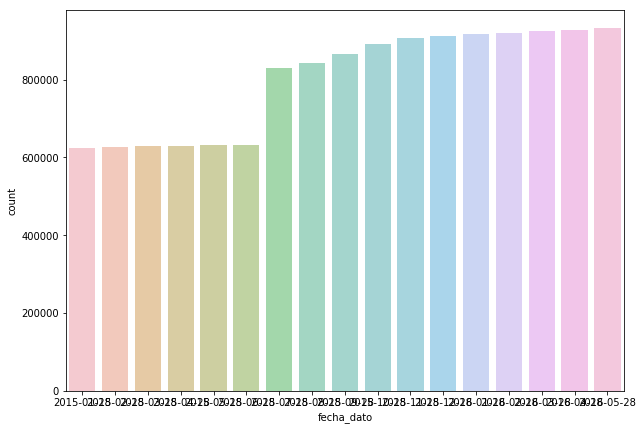

--------------------------------------------------
col:  ind_empleado


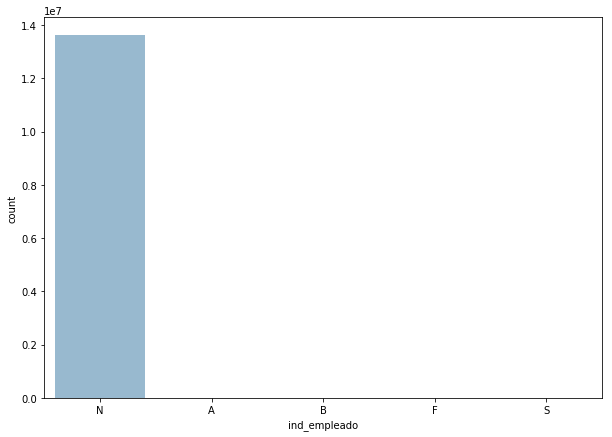

--------------------------------------------------
col:  pais_residencia


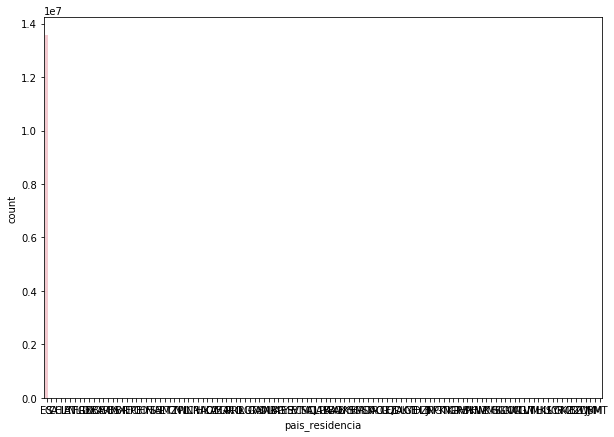

--------------------------------------------------
col:  sexo


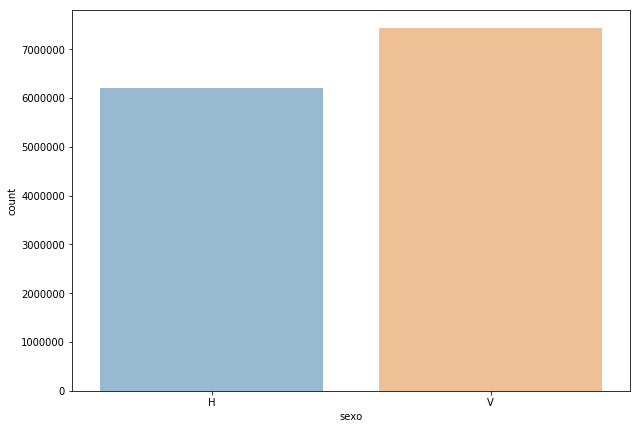

--------------------------------------------------
col:  age


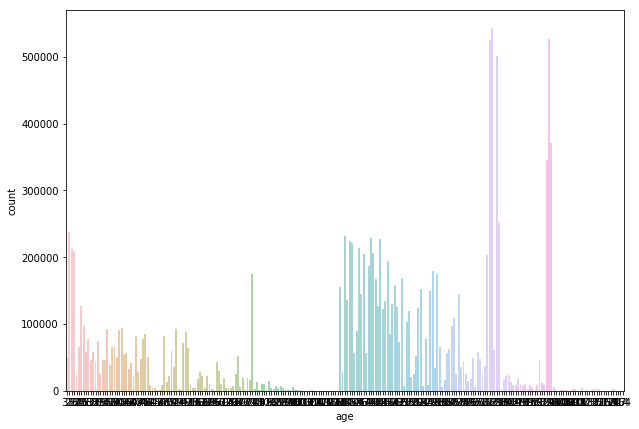

--------------------------------------------------
col:  fecha_alta


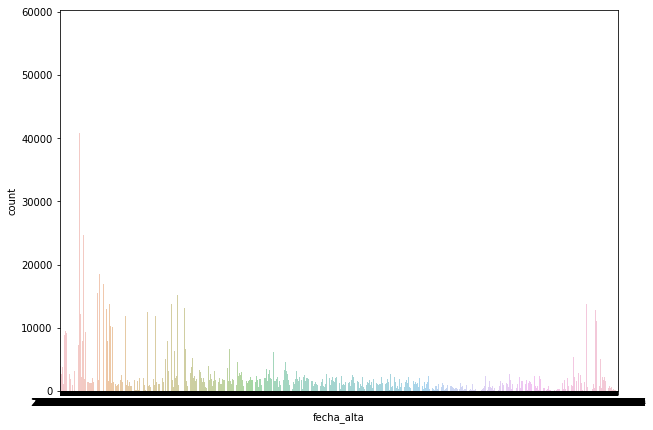

--------------------------------------------------
col:  ind_nuevo


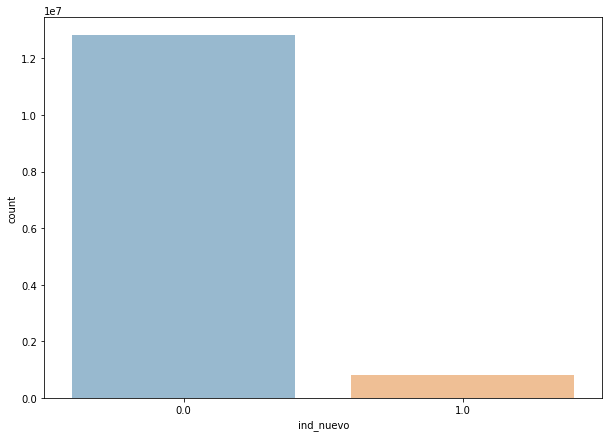

--------------------------------------------------
col:  antiguedad


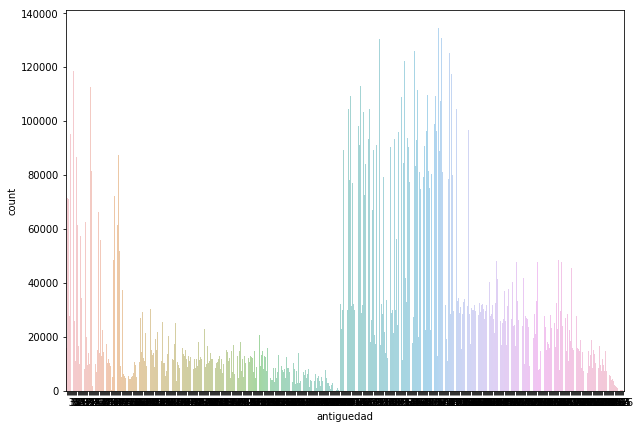

--------------------------------------------------
col:  indrel


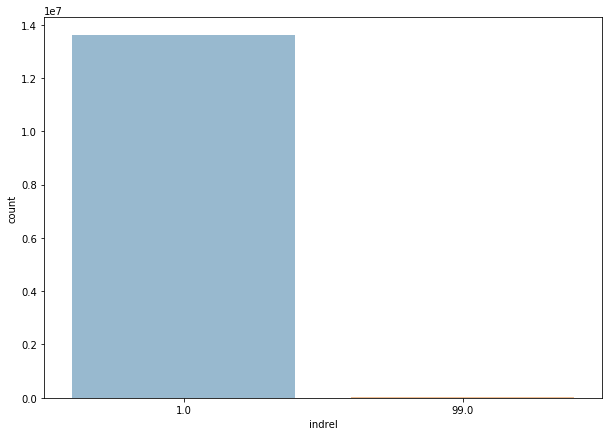

--------------------------------------------------
col:  ult_fec_cli_1t


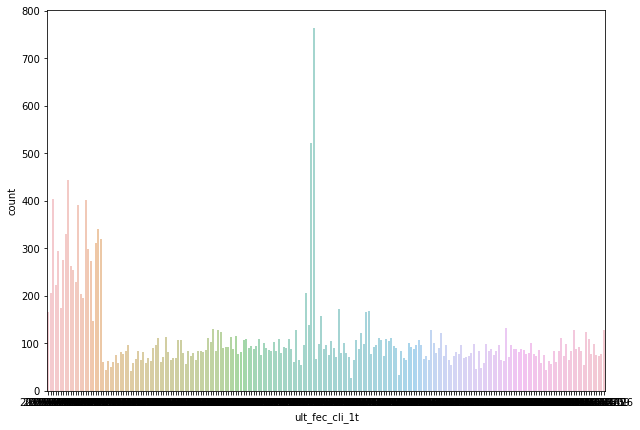

--------------------------------------------------
col:  indrel_1mes


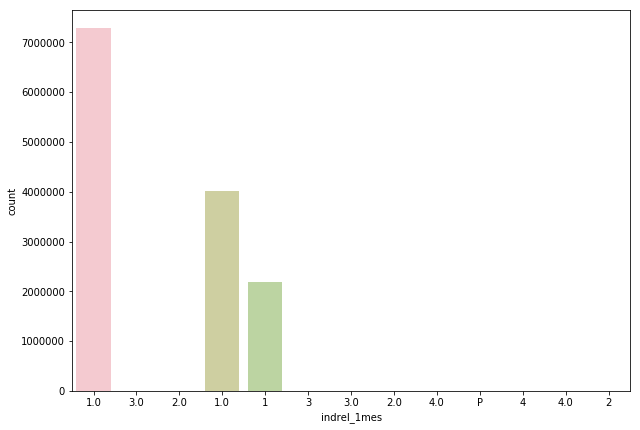

--------------------------------------------------
col:  tiprel_1mes


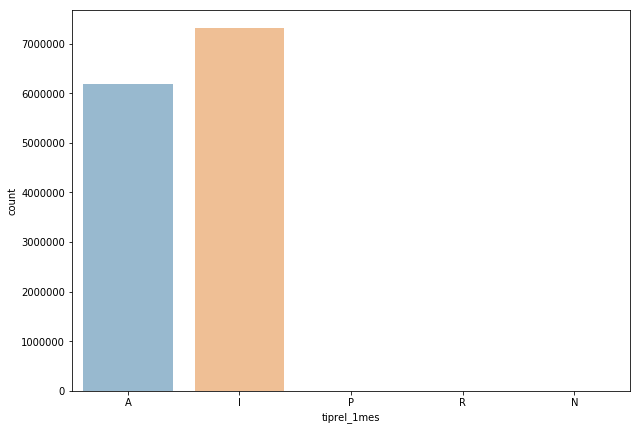

--------------------------------------------------
col:  indresi


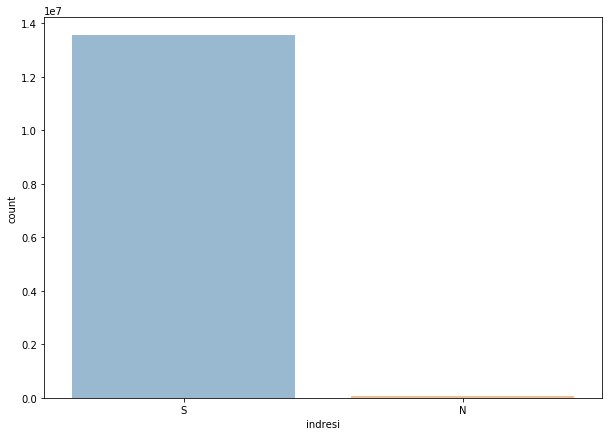

--------------------------------------------------
col:  indext


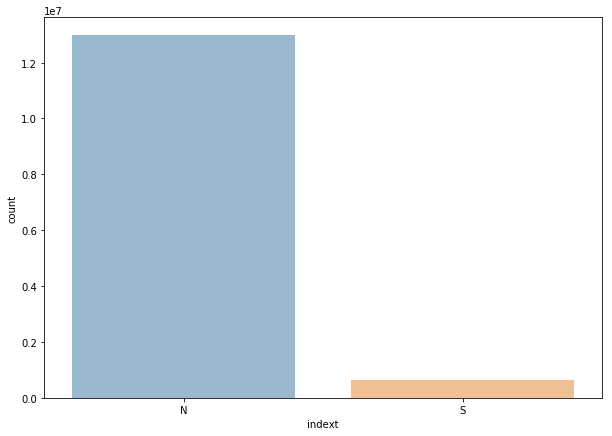

--------------------------------------------------
col:  conyuemp


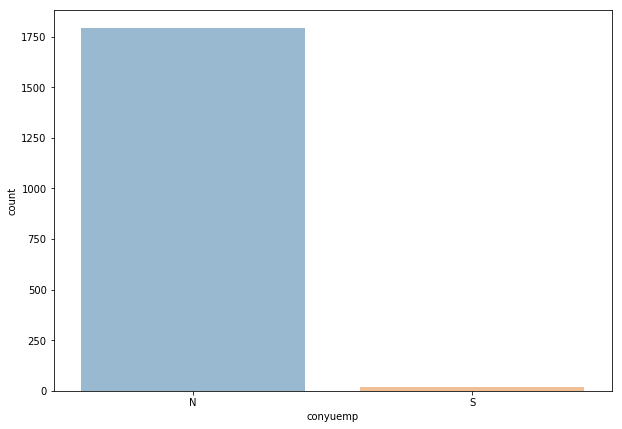

--------------------------------------------------
col:  canal_entrada


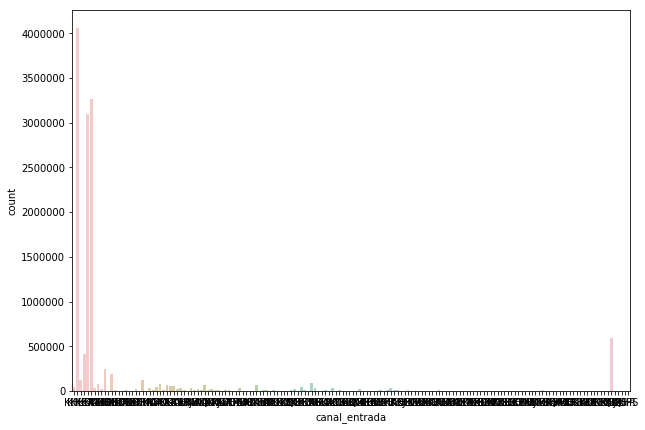

--------------------------------------------------
col:  indfall


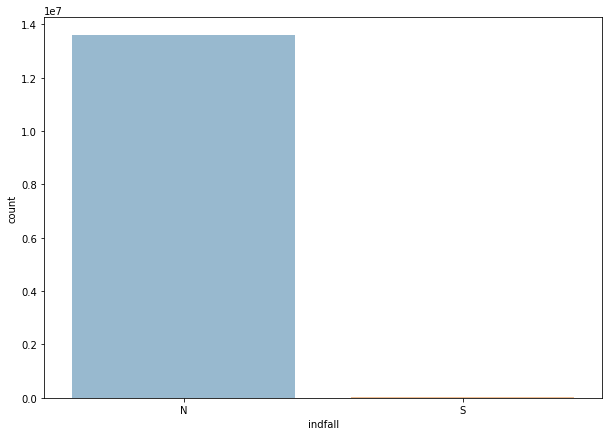

--------------------------------------------------
col:  tipodom


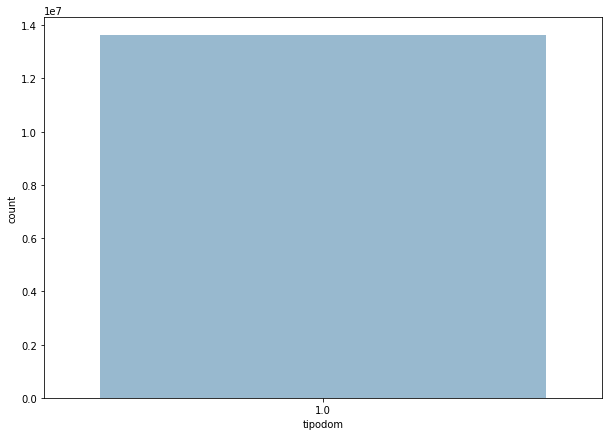

--------------------------------------------------
col:  cod_prov


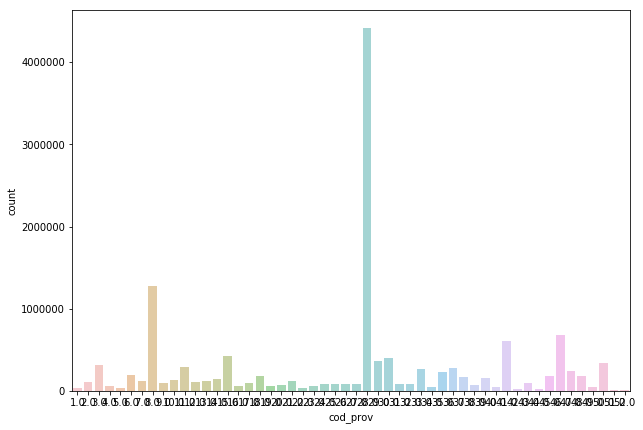

--------------------------------------------------
col:  nomprov


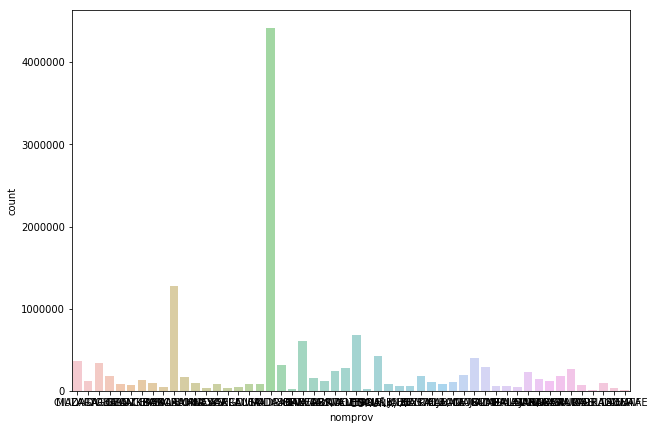

--------------------------------------------------
col:  ind_actividad_cliente


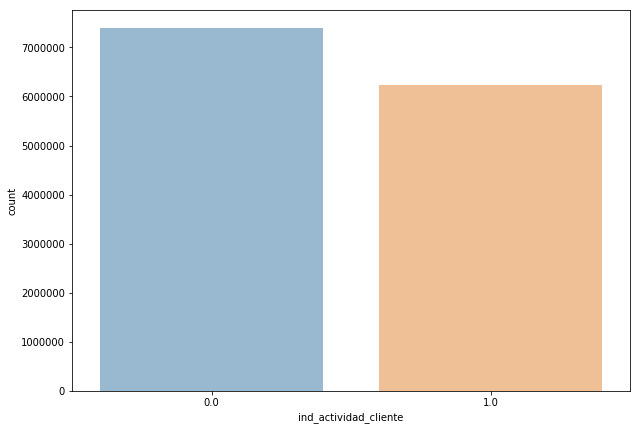

--------------------------------------------------
col:  segmento


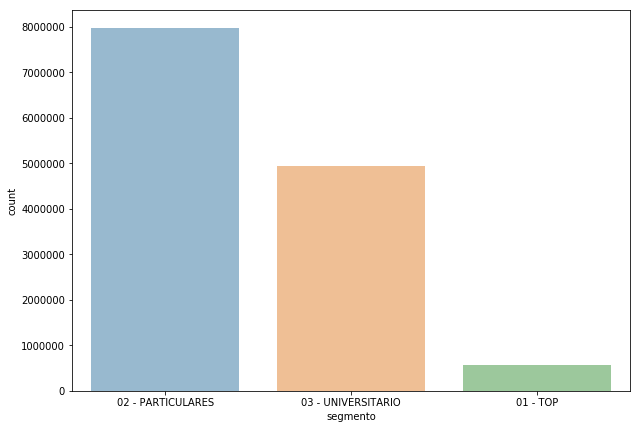

--------------------------------------------------
col:  ind_ahor_fin_ult1


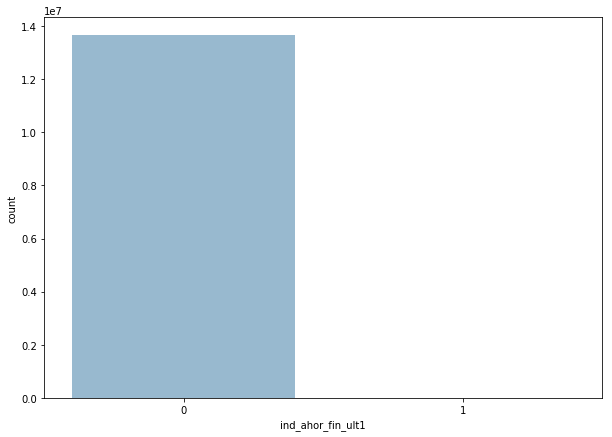

--------------------------------------------------
col:  ind_aval_fin_ult1


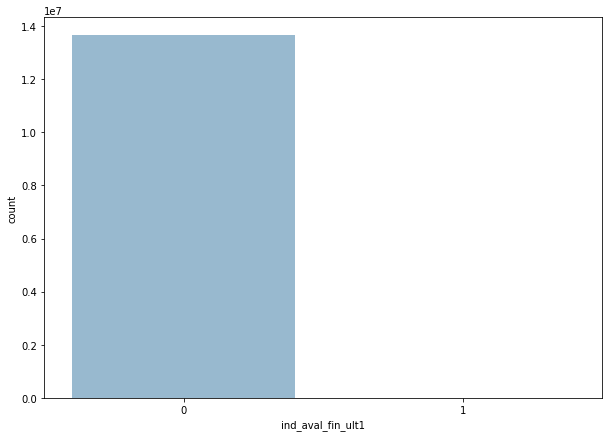

--------------------------------------------------
col:  ind_cco_fin_ult1


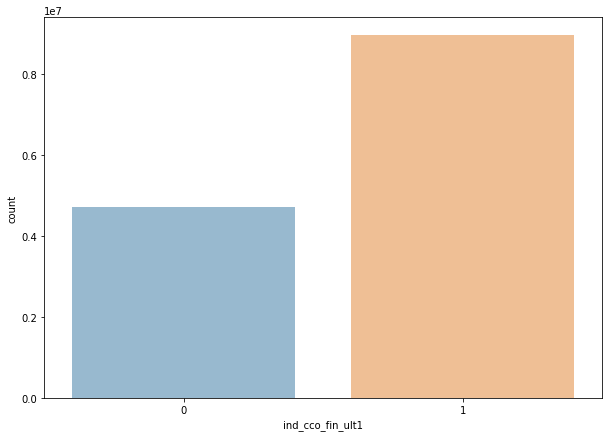

--------------------------------------------------
col:  ind_cder_fin_ult1


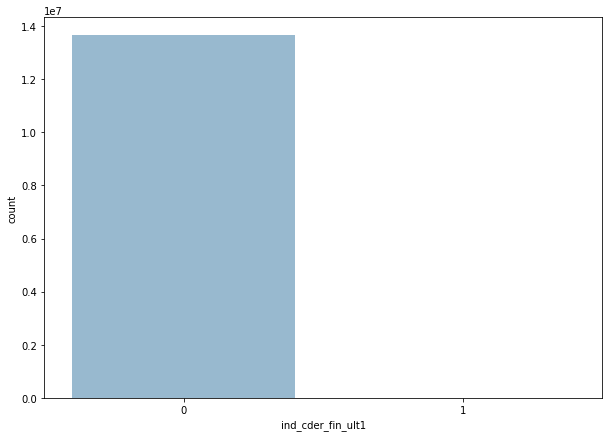

--------------------------------------------------
col:  ind_cno_fin_ult1


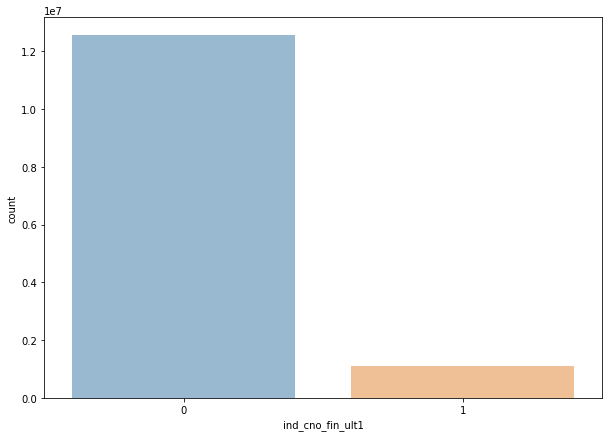

--------------------------------------------------
col:  ind_ctju_fin_ult1


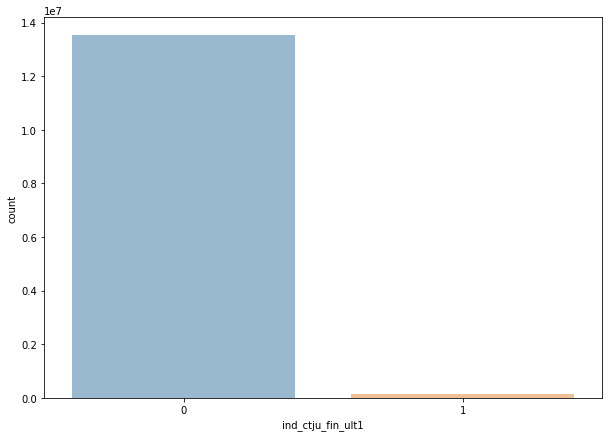

--------------------------------------------------
col:  ind_ctma_fin_ult1


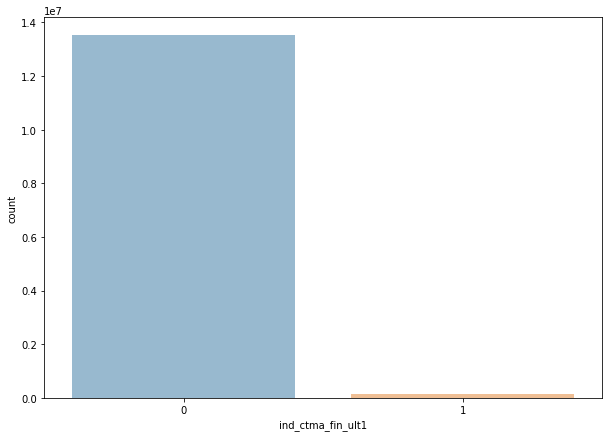

--------------------------------------------------
col:  ind_ctop_fin_ult1


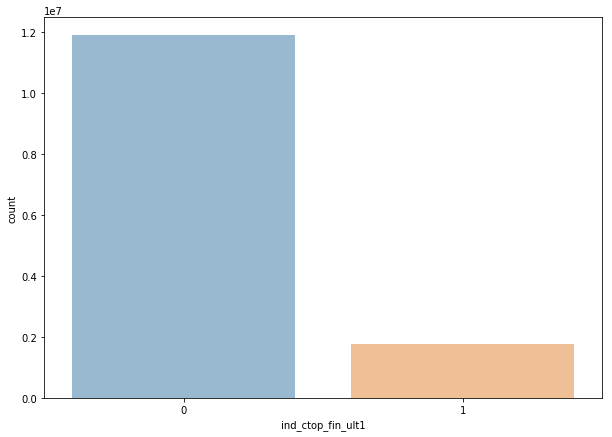

--------------------------------------------------
col:  ind_ctpp_fin_ult1


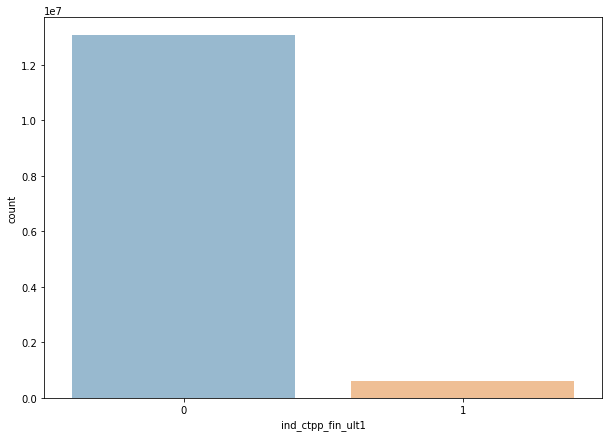

--------------------------------------------------
col:  ind_deco_fin_ult1


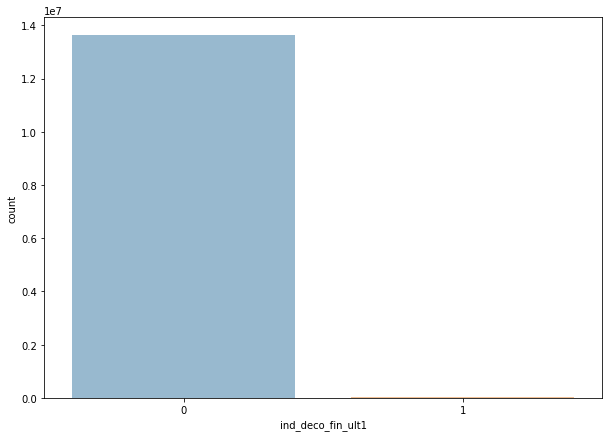

--------------------------------------------------
col:  ind_deme_fin_ult1


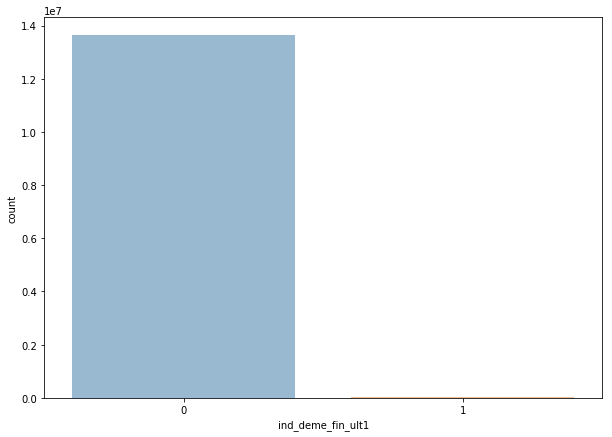

--------------------------------------------------
col:  ind_dela_fin_ult1


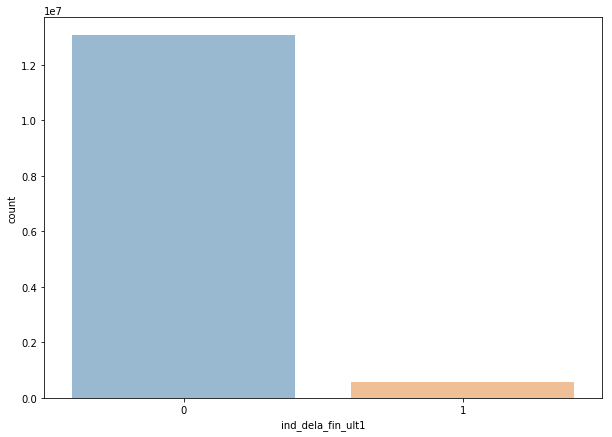

--------------------------------------------------
col:  ind_ecue_fin_ult1


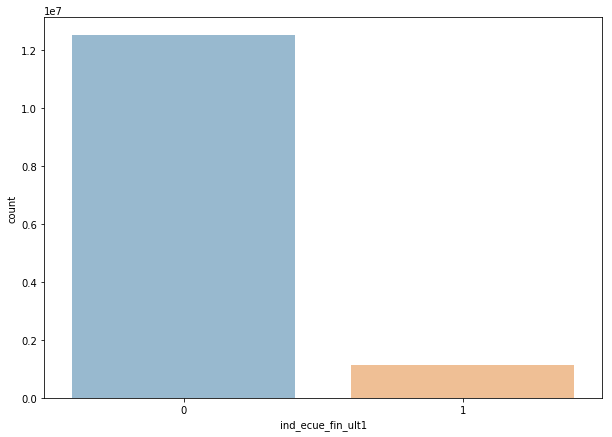

--------------------------------------------------
col:  ind_fond_fin_ult1


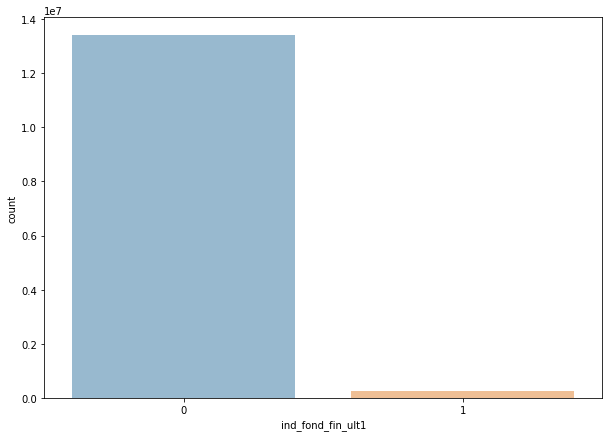

--------------------------------------------------
col:  ind_hip_fin_ult1


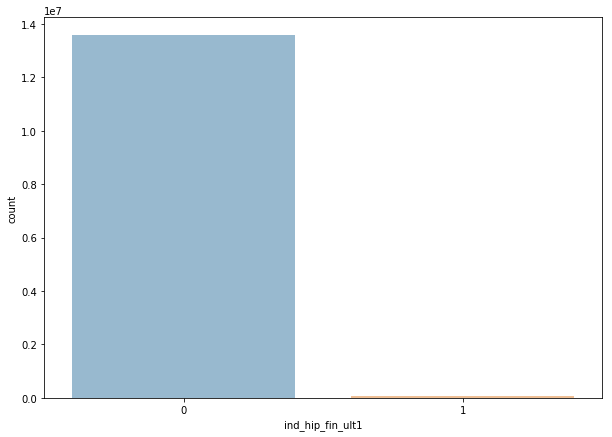

--------------------------------------------------
col:  ind_plan_fin_ult1


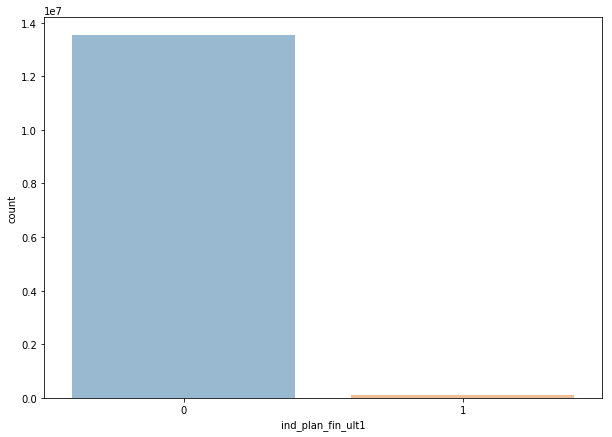

--------------------------------------------------
col:  ind_pres_fin_ult1


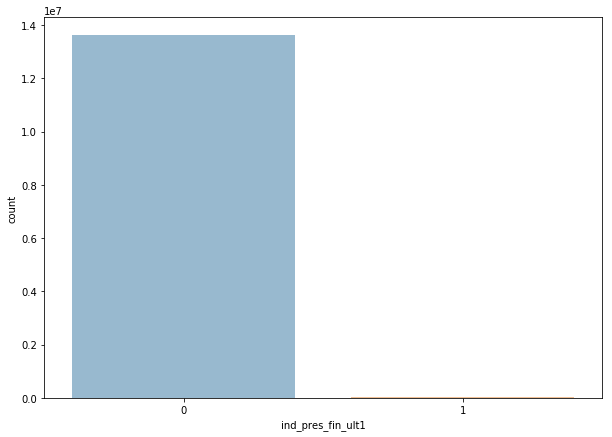

--------------------------------------------------
col:  ind_reca_fin_ult1


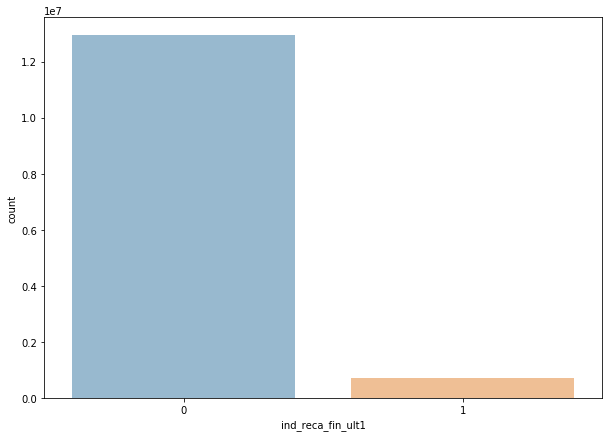

--------------------------------------------------
col:  ind_tjcr_fin_ult1


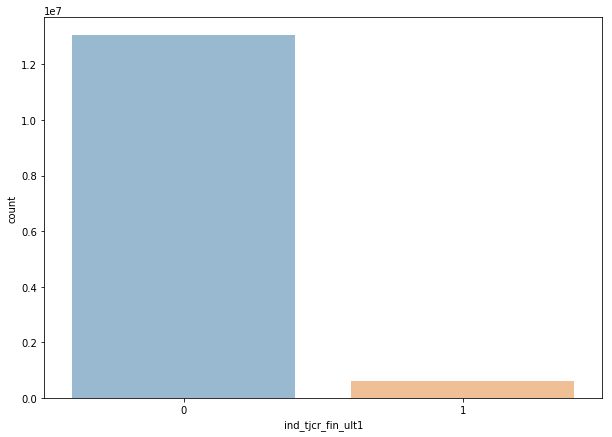

--------------------------------------------------
col:  ind_valo_fin_ult1


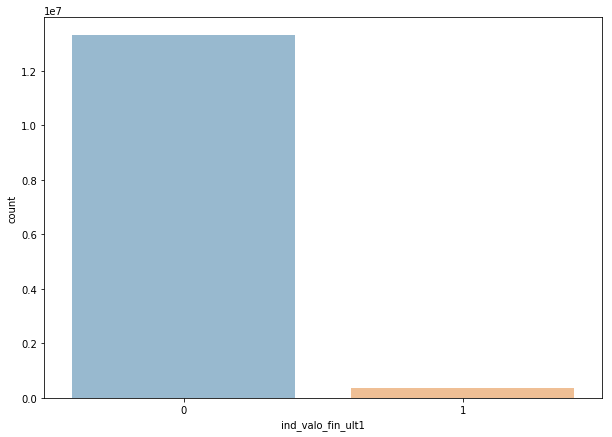

--------------------------------------------------
col:  ind_viv_fin_ult1


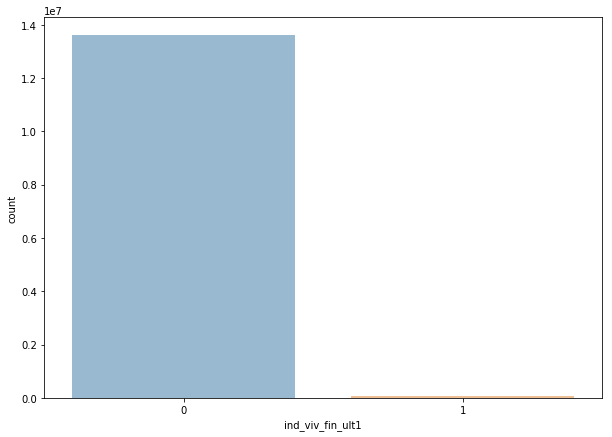

--------------------------------------------------
col:  ind_nomina_ult1


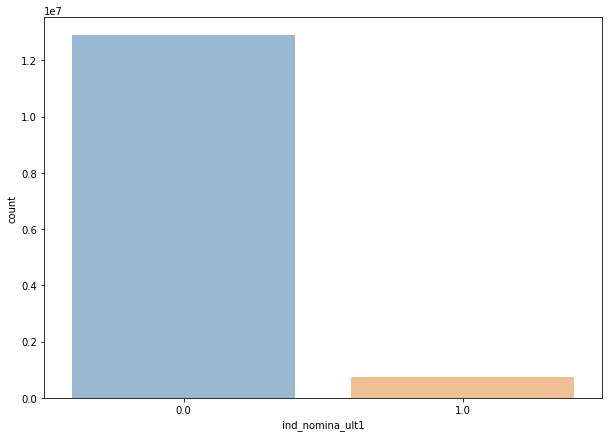

--------------------------------------------------
col:  ind_nom_pens_ult1


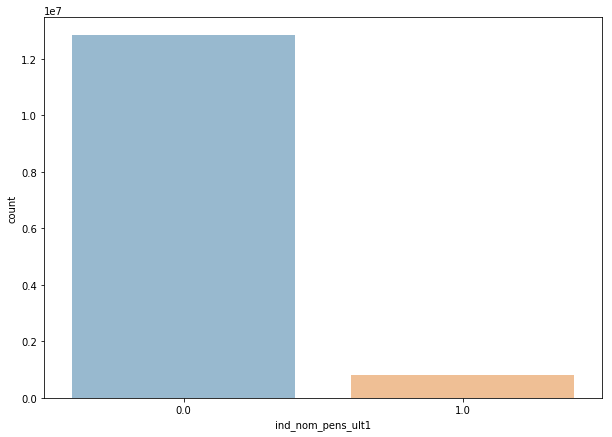

--------------------------------------------------
col:  ind_recibo_ult1


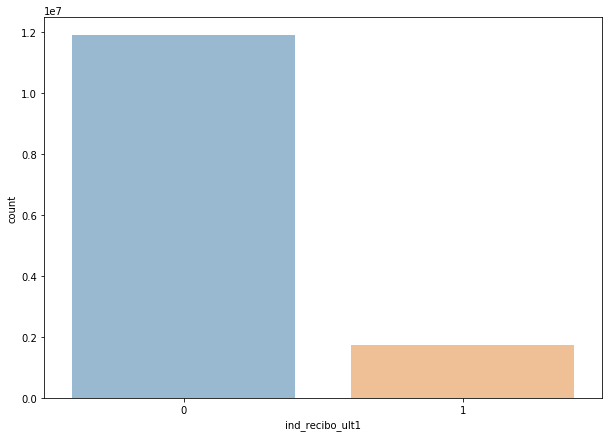

In [4]:
skip_cols = ['ncodpers','renta']
for col in train_data.columns:
    if col in skip_cols:
        continue
    print('-'*50)
    print('col: ', col)
    f, ax = plt.subplots(figsize=(10,7))
    sns.countplot(x=col, data=train_data, alpha=0.5)
    plt.show()

### 시계열
월별 금융 제품 보유 데이터 -> 누적 막대 그래프

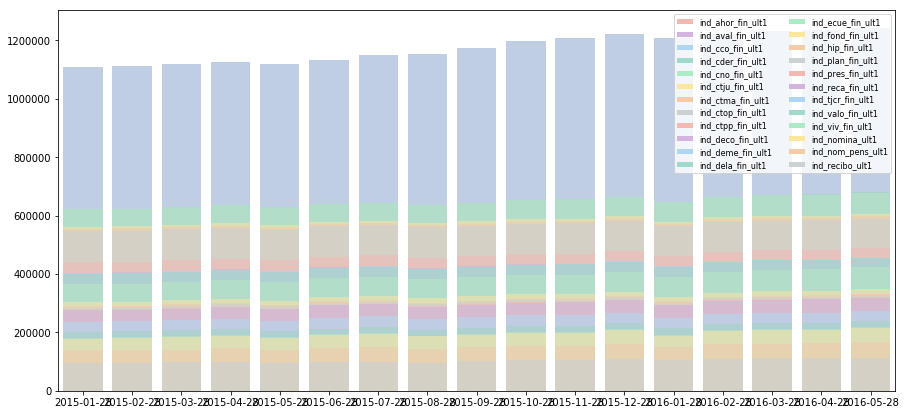

In [9]:
#날짜 데이터 별도 추출
months = train_data['fecha_dato'].unique().tolist()
#제품 변수 24개 추출
label_cols = train_data.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
    label_sum = train_data.groupby(['fecha_dato'])[label_cols[i]].agg('sum') #매월 각 제품의 총합
    label_over_time.append(label_sum.tolist())

label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0)) #누적 총합
    
colors = ['#F5B7B1','#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']
f, ax = plt.subplots(figsize=(15,7))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color=colors[i%8], alpha=0.7)
plt.legend([plt.Rectangle((0,0),1,1,fc=colors[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':8})

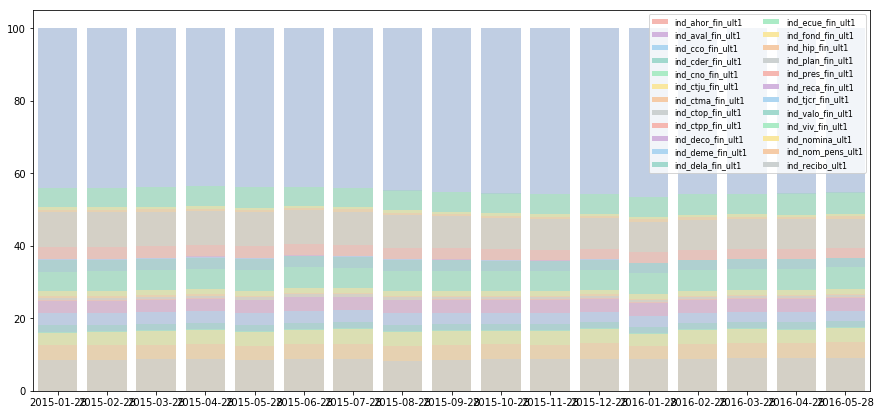

In [10]:
#절대값이 아닌 상대값으로 다시
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100
f, ax = plt.subplots(figsize=(15,7))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color=colors[i%8], alpha=0.7)
plt.legend([plt.Rectangle((0,0),1,1,fc=colors[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':8})

신규 구매 데이터 생성

In [20]:
prods = train_data.columns[24:].tolist() #제품 변수 저장
date_label = train_data['fecha_dato']

#날짜를 숫자로 변환: 1 (2015-1-28) ~ 18 (2016-6-28)
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date
train_data['int_date'] = train_data['fecha_dato'].map(date_to_int).astype(np.int8)

train_lag = train_data.copy()
train_lag['int_date'] += 1
train_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in train_data.columns] #변수명에 _prev 추가

#int_date 기준으로 원본과 lag 데이터를 합치면, 저번 달의 제품 정보가 삽입된다.
trn = train_data.merge(train_lag, on = ['ncodpers', 'int_date'], how='left')
del train_data, train_lag

In [36]:
#지난달의 제품 정보가 존재하지 않는 경우는 0으로 처리
for p in prods:
    prev = p + '_prev'
    trn[prev].fillna(0, inplace=True)
    
#신규 구매 변수 padd 만들기
for p in prods:
    padd = p + '_add'
    prev = p + '_prev'
    trn[padd] = ((trn[p] == 1) & (trn[prev] == 0)).astype(np.int8)

In [37]:
#신규 구매 변수만 추출해서 labels에 저장
add_cols = [p + '_add' for p in prods]
labels = trn[add_cols].copy()
labels.columns = prods

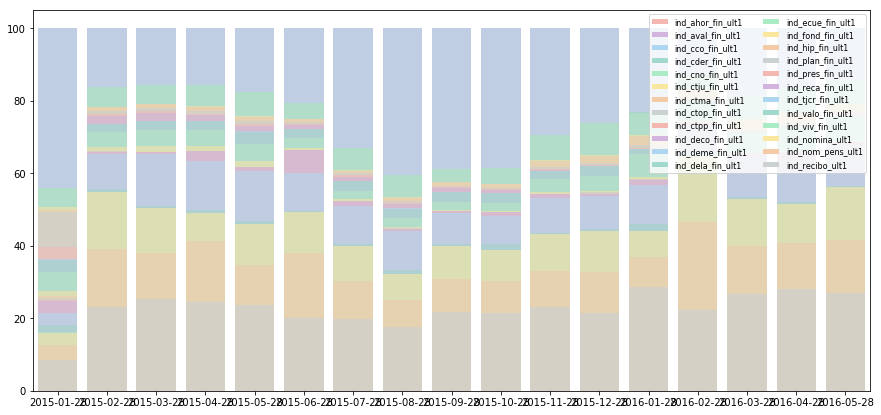

In [38]:
labels['date'] = date_label
months = np.unique(date_label).tolist()
label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist()) #월별 총합

label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0)) #누적 총합

label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100
    
colors = ['#F5B7B1','#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize=(15,7))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color=colors[i%8], alpha=0.7)
plt.legend([plt.Rectangle((0,0),1,1,fc=colors[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':8})